<a href="https://colab.research.google.com/github/VeraMendes/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/Vera_Mendes_LS_DS8_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

1. You also practice some 1-sample t-tests
2. You try and create some kind of a visualization that communicates the results of your hypothesis tests. This can be as simple as a histogram of the p-values or the t-statistics.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
import pandas as pd
import numpy as np
from statistics import mean, stdev

In [0]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-09-17 05:36:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.4’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2019-09-17 05:36:50 (127 KB/s) - ‘house-votes-84.data.4’ saved [18171/18171]



In [4]:
# Load Data
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                        'budget','physician-fee-freeze', 'el-salvador-aid',
                        'religious-groups','anti-satellite-ban',
                        'aid-to-contras','mx-missile','immigration',
                        'synfuels', 'education', 'right-to-sue','crime',
                        'duty-free','south-africa'])
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [5]:
# cleaning data
# replace N by 1 Y by 2 and ? by 0
df = df.replace({'?':0, 'n':1, 'y':2})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,1,2,1,2,2,2,1,1,1,2,0,2,2,2,1,2
1,republican,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,0
2,democrat,0,2,2,0,2,2,1,1,1,1,2,1,2,2,1,1
3,democrat,1,2,2,1,0,2,1,1,1,1,2,1,2,1,1,2
4,democrat,2,2,2,1,2,2,1,1,1,1,2,0,2,2,2,2


In [6]:
# checking for NaNs
df.isnull().sum()

party                   0
handicapped-infants     0
water-project           0
budget                  0
physician-fee-freeze    0
el-salvador-aid         0
religious-groups        0
anti-satellite-ban      0
aid-to-contras          0
mx-missile              0
immigration             0
synfuels                0
education               0
right-to-sue            0
crime                   0
duty-free               0
south-africa            0
dtype: int64

In [0]:
# Filtering df into democrats & republicans dfs

dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [8]:
print(dem.shape)
dem.head()

(267, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,0,2,2,0,2,2,1,1,1,1,2,1,2,2,1,1
3,democrat,1,2,2,1,0,2,1,1,1,1,2,1,2,1,1,2
4,democrat,2,2,2,1,2,2,1,1,1,1,2,0,2,2,2,2
5,democrat,1,2,2,1,2,2,1,1,1,1,1,1,2,2,2,2
6,democrat,1,2,1,2,2,2,1,1,1,1,1,1,0,2,2,2


In [9]:
print(rep.shape)
rep.head()

(168, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,1,2,1,2,2,2,1,1,1,2,0,2,2,2,1,2
1,republican,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,0
7,republican,1,2,1,2,2,2,1,1,1,1,1,1,2,2,0,2
8,republican,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,2
10,republican,1,2,1,2,2,1,1,1,1,1,0,0,2,2,1,1


In [0]:
# 5 steps 2 sample T-Test

# step 1: our Null Hypothesis default state
# rep and dem voting similarly in different issues

# step 2: our Alternative Hypothesis
# rep and dem voting differently in different issues

# step 3: our confidence interval
# We are looking into a 95% confidence value

# calculating T-test
# step 4: T-statistic result
# step 5: P-value result

In [0]:
rep.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.00000,168.000000,168.000000,168.000000,168.000000
mean,1.166667,1.327381,1.107143,1.952381,1.916667,1.875000,1.196429,1.077381,1.095238,1.529762,1.071429,1.72619,1.750000,1.898810,1.011905,1.440476
std,0.419105,0.679001,0.379658,0.285572,0.335819,0.366036,0.480256,0.451173,0.350160,0.535289,0.417742,0.59642,0.555323,0.418722,0.394393,0.715126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.00000,2.000000,2.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.00000,2.000000,2.000000,1.000000,2.000000
75%,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.00000,2.000000,2.000000,1.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000


In [0]:
dem.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,1.550562,1.344569,1.838951,1.022472,1.161049,1.426966,1.719101,1.801498,1.632959,1.449438,1.438202,1.067416,1.217228,1.299625,1.539326,1.340824
std,0.562177,0.661224,0.433880,0.286705,0.475232,0.559692,0.512742,0.435628,0.613231,0.527683,0.580803,0.445472,0.532411,0.534628,0.608020,0.917632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.500000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [0]:
# Sample size
n_rep = rep.shape[0]
n_dem = dem.shape[0]

In [0]:
# Looking into issue physician-fee-freeze

# Mean for rep and dem
xbar_rep_pff = rep['physician-fee-freeze'].mean()
xbar_dem_pff = dem['physician-fee-freeze'].mean()

# Standard Deviation for rep and dem
s_rep_pff = stdev(rep['physician-fee-freeze'])
s_dem_pff = stdev(dem['physician-fee-freeze'])

In [0]:
statistics_pff, pvalue_pff =ttest_ind(rep['physician-fee-freeze'], dem['physician-fee-freeze'])
print(statistics_pff, pvalue_pff)

32.98621261279476 3.302718289712652e-120


In [0]:
if pvalue_pff < .01:
  print('Reject Null Hypothesis for physician-fee-freeze')
else:
  print('Fail to Reject Null Hypothesis for physician-fee-freeze')

Reject Null Hypothesis for physician-fee-freeze


## Conclusion: republicans support physician-fee-freeze more than democrats

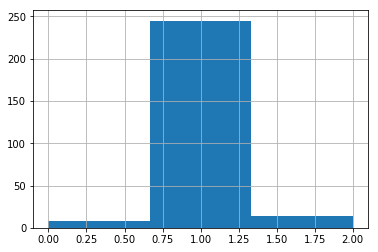

In [0]:
dem['physician-fee-freeze'].hist(bins=3);

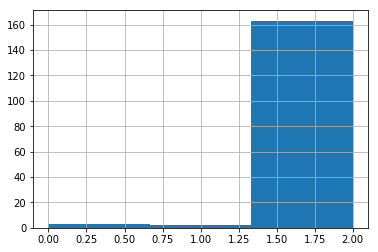

In [0]:
rep['physician-fee-freeze'].hist(bins=3);

In [0]:
# Looking into issue aid-to-contras

# Mean for rep and dem
xbar_rep_pff = rep['aid-to-contras'].mean()
xbar_dem_pff = dem['aid-to-contras'].mean()

# Standard Deviation for rep and dem
s_rep_pff = stdev(rep['aid-to-contras'])
s_dem_pff = stdev(dem['aid-to-contras'])

In [0]:
statistics_atc, pvalue_atc =ttest_ind(rep['aid-to-contras'], dem['aid-to-contras'])
print(statistics_atc, pvalue_atc)

-16.647856664632073 1.8552450851616904e-48


In [0]:
if pvalue_atc < .01:
  print('Reject Null Hypothesis for aid-to-contras')
else:
  print('Fail to Reject Null Hypothesis for aid-to-contras')

Reject Null Hypothesis for aid-to-contras


In [0]:
# checking meaning of negative value on statistics and making sure p-value is the same no matter the order of samples.
ttest_ind(dem['aid-to-contras'], rep['aid-to-contras'], nan_policy='omit')

Ttest_indResult(statistic=16.647856664632073, pvalue=1.8552450851616904e-48)

## Conclusion: democrats support aid-to-contras issue more than republicans

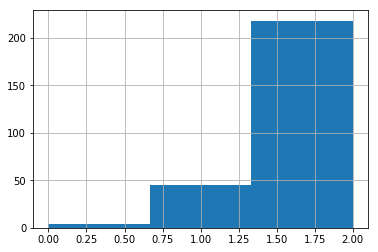

In [0]:
dem['aid-to-contras'].hist(bins=3);

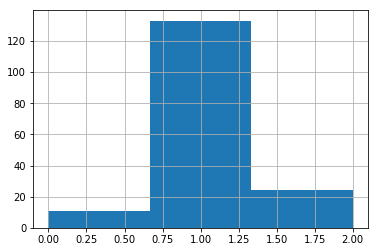

In [0]:
rep['aid-to-contras'].hist(bins=3);

In [0]:
# Looking into issue water-project

# Mean for rep and dem
xbar_rep_pff = rep['water-project'].mean()
xbar_dem_pff = dem['water-project'].mean()

# Standard Deviation for rep and dem
s_rep_pff = stdev(rep['water-project'])
s_dem_pff = stdev(dem['water-project'])


In [0]:
statistics_wp, pvalue_wp = ttest_ind(rep['water-project'], dem['water-project'])
print(statistics_wp, pvalue_wp)

-0.26123695128271957 0.7940339911768173


In [0]:
if pvalue < .1:
  print('Reject Null Hypothesis for Water-project')
else:
  print('Fail to Reject Null Hypothesis for Water-project')

Fail to Reject Null Hypothesis for Water-project


## Both parties voted quite similarly in this topic.

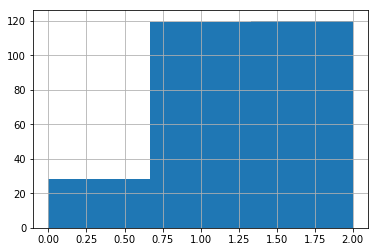

In [0]:
dem['water-project'].hist(bins=3);

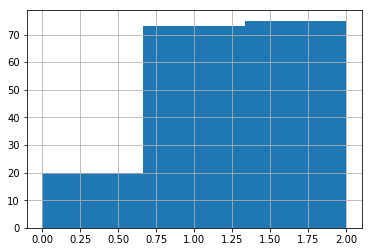

In [0]:
rep['water-project'].hist(bins=3);

### 1 sample T-Test for dem supporting issue: immigration

In [0]:
from scipy.stats import ttest_1samp

In [0]:
# Null Hypothesis: 0 supporting issue immigration on democrats side
# Alternative Hypothesis: non-0 supporting issue immigration on democrats side
# Confidence level: 95%

In [0]:
statistics_i, pvalue_i = ttest_1samp(dem['immigration'], 0)
print(statistics_i, pvalue_i)

44.883070169765325 4.048740696754521e-126


In [0]:
if pvalue_i < .01:
  print('Reject Null Hypothesis for immigration')
else:
  print('Fail to Reject Null Hypothesis for immigration')

Reject Null Hypothesis for immigration


## Conclusion: There are non-0 democrats supporting the immigration issue.

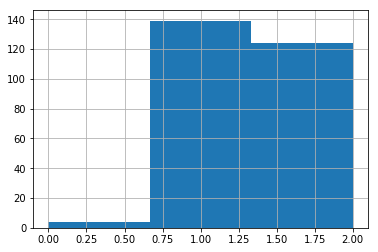

In [0]:
dem['immigration'].hist(bins=3);

## Stretch Goal

## p-value	Interpretation
### over 0.1	no evidence that the null hypothesis does not hold
### between 0.05 and 0.1	very weak evidence that the null hypothesis does not hold
### between 0.01 and 0.05	moderately strong evidence that the null hypothesis does not hold
### under 0.01	strong evidence that the null hypothesis does not hold

In [0]:
def statistics_pvalue(sample1, sample2):
 return ttest_ind(sample1, sample2)

no_evidence = []
weak_evidence = []
moderate_evidence = []
dem_support_reject_null_hypothesis = []
rep_support_reject_null_hypothesis = []

for column in df:
  if df[column].name != 'party':
    stats = statistics_pvalue(dem[column], rep[column])[0]
    pvalue = statistics_pvalue(dem[column], rep[column])[1]
    if pvalue > .1:
      no_evidence.append(column)
    elif pvalue > .05 and pvalue < .1:
      weak_evidence.append(column)
    elif pvalue > .01 and pvalue < .05:
      moderate_evidence.append(column)
    else:
      if pvalue < .01:
        if dem[column].mean()>rep[column].mean():
          dem_support_reject_null_hypothesis.append(column)
        if rep[column].mean()>dem[column].mean():
          rep_support_reject_null_hypothesis.append(column)

In [0]:
print("Issues that Fail to Reject Null Hypothesis:", no_evidence)
# print(weak_evidence)
# print(moderate_evidence)
print("Republicans support this issue more than Democrats,Reject Null Hypothesis:", dem_support_reject_null_hypothesis)
print("Democrats support this issue more than Republicans,Reject Null Hypothesis:", rep_support_reject_null_hypothesis)

Issues that Fail to Reject Null Hypothesis: ['water-project', 'immigration', 'south-africa']
Republicans support this issue more than Democrats,Reject Null Hypothesis: ['handicapped-infants', 'budget', 'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'synfuels', 'duty-free']
Democrats support this issue more than Republicans,Reject Null Hypothesis: ['physician-fee-freeze', 'el-salvador-aid', 'religious-groups', 'education', 'right-to-sue', 'crime']


In [39]:
df1 = df.pivot_table(columns='party')
print(df1)

party                 democrat  republican
aid-to-contras        1.801498    1.077381
anti-satellite-ban    1.719101    1.196429
budget                1.838951    1.107143
crime                 1.299625    1.898810
duty-free             1.539326    1.011905
education             1.067416    1.726190
el-salvador-aid       1.161049    1.916667
handicapped-infants   1.550562    1.166667
immigration           1.449438    1.529762
mx-missile            1.632959    1.095238
physician-fee-freeze  1.022472    1.952381
religious-groups      1.426966    1.875000
right-to-sue          1.217228    1.750000
south-africa          1.340824    1.440476
synfuels              1.438202    1.071429
water-project         1.344569    1.327381


In [42]:
table = pd.crosstab(df.party, df.budget == 2, normalize='index')*100

table

budget,False,True
party,,
democrat,13.483146,86.516854
republican,86.904762,13.095238
